# MSA PHASE 1 DATA SCIENCE | DAVID HOANG

# IMPORT

In [1]:
import sys
import json
import pandas as pd
import requests
import time
sys.path.append('/home/nbuser/library/')

#for the data cleaning
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# API CALL

In [2]:
def get_populationCount(longitude, latitude):

    time.sleep(0.2)
    
    url = 'https://koordinates.com/services/query/v1/vector.json'

    
    params = {
        'key' : '633c2dacabd245e4b0ce480265b043a3',
        'layer' : 104612 ,
        'x' : longitude,
        'y' : latitude
    }    
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        return response.status_code
    
    response = response.json()
    #print(response.items())
    # C18 has the current population count, have to transverse dictionaries of dictionaries
    
    
    pop_count = response['vectorQuery']['layers']['104612']['features'][0]['properties']['C18_CURPop']
    return pd.Series({'Population Count' : pop_count})

# READ CSV 

Finding the pop count for every property in our csv file

In [4]:
df = pd.read_csv("house dataset.csv") #read the csv with panda

In [5]:
#creates new column based on row to row information from latitude and longitude axis = 0 would make it by columns

df['C18_CURPop'] = df.apply(lambda row: get_populationCount(row['Longitude'], row['Latitude'] ), axis = 1)

In [6]:
df.head()


,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPop
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231


## DOWNLOADING CSV

In [7]:
!curl https://www.otago.ac.nz/wellington/otago730395.xlsx -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1178k  100 1178k    0     0   317k      0  0:00:03  0:00:03 --:--:--  317k


## READING IT IN

In [8]:
deprIndex = pd.read_excel('otago730395.xlsx')
merged_df = df.merge(deprIndex, left_on='SA1', right_on='SA12018_code')
merged_df

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,...,50-59 years,60+ years,Suburbs,C18_CURPop,SA12018_code,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,...,24,21,Manurewa,174,7009770,6.0,997.0,174,159600,Hillpark North
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,...,15,30,Karaka,129,7009991,1.0,881.0,129,162500,Hingaia
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,...,15,30,Karaka,129,7009991,1.0,881.0,129,162500,Hingaia
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,...,12,15,Onehunga,120,7007871,2.0,908.0,120,144300,Onehunga North
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,...,21,33,Clover Park,231,7008902,9.0,1091.0,231,157700,Clover Park North
5,3,1.0,"14 Tainui Terrace Mangere Bridge, Auckland",100,1050000,-36.943929,174.780501,7007917,63,15,...,30,39,Mangere Bridge,195,7007917,4.0,942.0,195,146800,Mangere Bridge
6,3,1.0,"54 Kelmarna Avenue Ponsonby, Auckland",531,2525000,-36.849239,174.734451,7004908,33,12,...,15,9,Ponsonby,102,7004908,4.0,951.0,102,130400,Ponsonby West
7,3,2.0,"39 Rawhiti Road One Tree Hill, Auckland",1024,1400000,-36.907700,174.796042,7005903,36,33,...,12,24,One Tree Hill,162,7005903,4.0,951.0,162,142800,One Tree Hill
8,3,2.0,"17b Tawa Crescent Manurewa, Auckland",80,475000,-37.033322,174.898113,7009808,45,27,...,12,12,Manurewa,126,7009808,10.0,1164.0,126,160900,Manurewa South
9,4,2.0,"39a Keegan Drive Massey, Auckland",204,660000,-36.846208,174.620794,7003826,30,27,...,24,12,Massey,141,7003826,6.0,988.0,141,122500,Massey East


In [9]:
#size of data
merged_df.shape

(1051, 22)

### Dropping unnecssary columns

In [10]:
#new data frame with unnecessary columns dropped
df2 = merged_df.drop(["SA12018_code", "NZDep2018_Score", "URPopnSA1_2018", "SA22018_code", "SA22018_name"], axis = 1)

In [11]:
df2.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPop,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0


### Some land area values had m^2 in it and some dont removing them and making it a float

In [12]:
#extract all the digits from the strings and put it back
df2['Land area'] = df2['Land area'].str.extract('(\d+)').astype(float)

In [13]:
#successfully stripped land area
df2.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,C18_CURPop,NZDep2018
count,1051.000000,1049.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,3.777355,2.073403,856.989534,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609,179.914367,5.063749
std,1.169412,0.992985,1588.156219,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031,71.059280,2.913471
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,3.000000,1.000000,321.000000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000
50%,4.000000,2.000000,571.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,5.000000
75%,4.000000,3.000000,825.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,210.000000,8.000000
max,17.000000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,10.000000


### Checking for null values 

In [14]:
# #checking null values
df2.isnull().values.any()

True

In [15]:
#finding out where missing values are
df2.isnull().sum()
#missing values for surburbs at 568


Bedrooms       0
Bathrooms      2
Address        0
Land area      0
CV             0
Latitude       0
Longitude      0
SA1            0
0-19 years     0
20-29 years    0
30-39 years    0
40-49 years    0
50-59 years    0
60+ years      0
Suburbs        1
C18_CURPop     0
NZDep2018      0
dtype: int64

In [16]:
df3 = df2[df2.isna().any(axis=1)]

In [17]:
df3

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPop,NZDep2018
309,4,NaN,"14 Hea Road Hobsonville, Auckland",214.0,1250000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,252,2.0
311,4,NaN,"16 Hea Road Hobsonville, Auckland",245.0,1100000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,252,2.0
568,1,1.0,"14 Te Rangitawhiri Road Great Barrier Island, ...",2141.0,740000,-36.197282,175.416921,7001131,27,6,6,18,39,60,NaN,156,9.0


In [18]:
df2.mean()

Bedrooms       3.777355e+00
Bathrooms      2.073403e+00
Land area      8.569895e+02
CV             1.387521e+06
Latitude      -3.689371e+01
Longitude      1.747993e+02
SA1            7.006319e+06
0-19 years     4.754900e+01
20-29 years    2.896384e+01
30-39 years    2.704282e+01
40-49 years    2.412559e+01
50-59 years    2.261560e+01
60+ years      2.936061e+01
C18_CURPop     1.799144e+02
NZDep2018      5.063749e+00
dtype: float64

In [19]:
#DROPPED THE ROW WITH NA VALUE IN SUBURBS
#can physically check on google map with the latitude but not sure if I should?
df2 = df2.loc[df2['Suburbs'].isnull() != True]

In [20]:
#verify that the drop is correct
firstnadrop = df2[df2.isna().any(axis=1)]
firstnadrop

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPop,NZDep2018
309,4,NaN,"14 Hea Road Hobsonville, Auckland",214.0,1250000,-36.798371,174.64743,7002267,60,66,60,24,24,18,Hobsonville,252,2.0
311,4,NaN,"16 Hea Road Hobsonville, Auckland",245.0,1100000,-36.798371,174.64743,7002267,60,66,60,24,24,18,Hobsonville,252,2.0


In [21]:
#change the na values to median
cleaned_df = df2.fillna(value = df2["Bathrooms"].median())
#this shows that there is no more na values
cleaned_df[cleaned_df.isna().any(axis=1)]


,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPop,NZDep2018


In [22]:
#double checking
cleaned_df.iloc[309:312]

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPop,NZDep2018
309,4,2.0,"14 Hea Road Hobsonville, Auckland",214.0,1250000,-36.798371,174.64743,7002267,60,66,60,24,24,18,Hobsonville,252,2.0
310,4,2.0,"12 Hea Road Hobsonville, Auckland",191.0,530000,-36.798371,174.64743,7002267,60,66,60,24,24,18,Hobsonville,252,2.0
311,4,2.0,"16 Hea Road Hobsonville, Auckland",245.0,1100000,-36.798371,174.64743,7002267,60,66,60,24,24,18,Hobsonville,252,2.0


In [23]:
cleaned_df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPop,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714.0,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564.0,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626.0,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65.0,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601.0,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0


In [24]:
cleaned_df.dtypes

Bedrooms         int64
Bathrooms      float64
Address         object
Land area      float64
CV               int64
Latitude       float64
Longitude      float64
SA1              int64
0-19 years       int64
20-29 years      int64
30-39 years      int64
40-49 years      int64
50-59 years      int64
60+ years        int64
Suburbs         object
C18_CURPop       int64
NZDep2018      float64
dtype: object

### Finished cleaning the data

# Visualisation without logged data values

In [25]:
dataset = cleaned_df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe135c57748>,
      dtype=object)

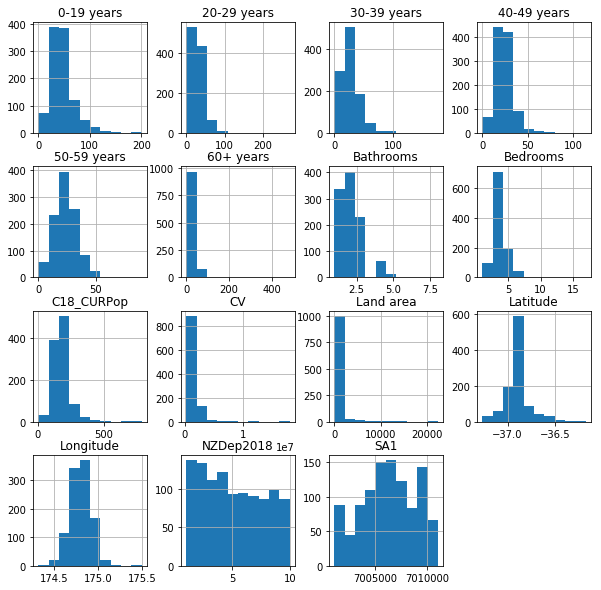

In [26]:
dataset.hist(figsize=(10,10))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


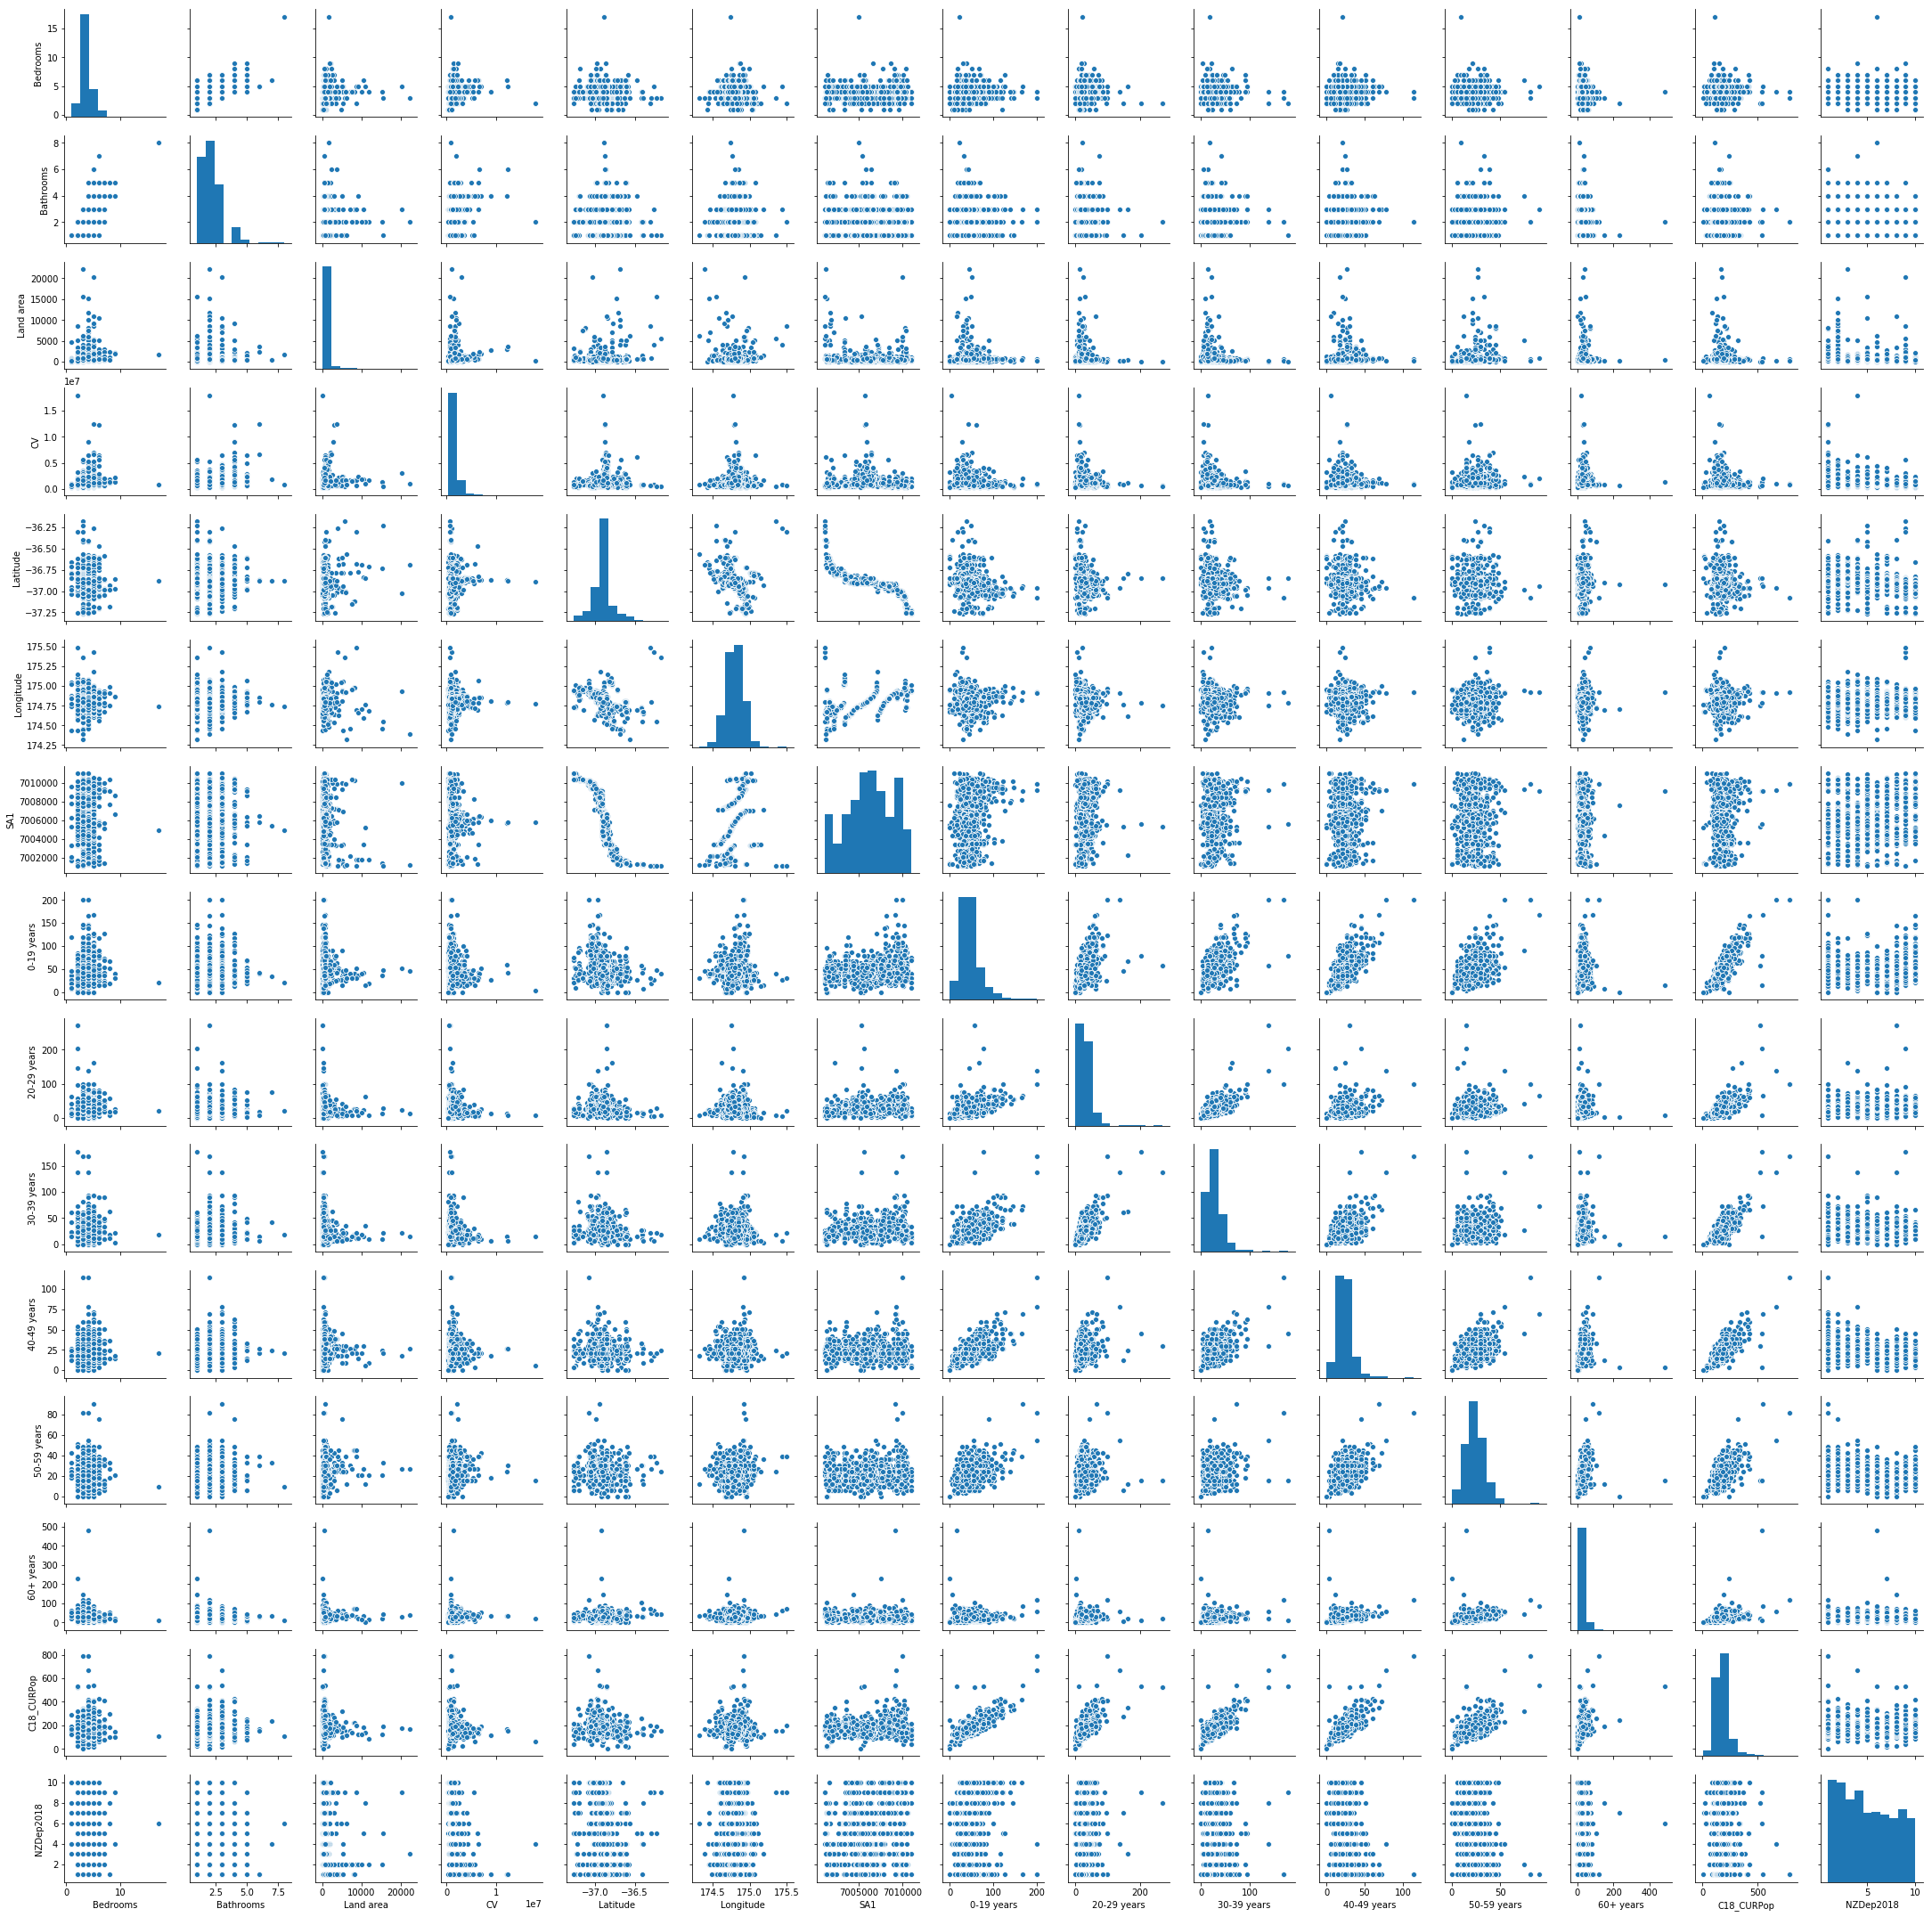

In [27]:
sns.pairplot(dataset, size = 2.0)

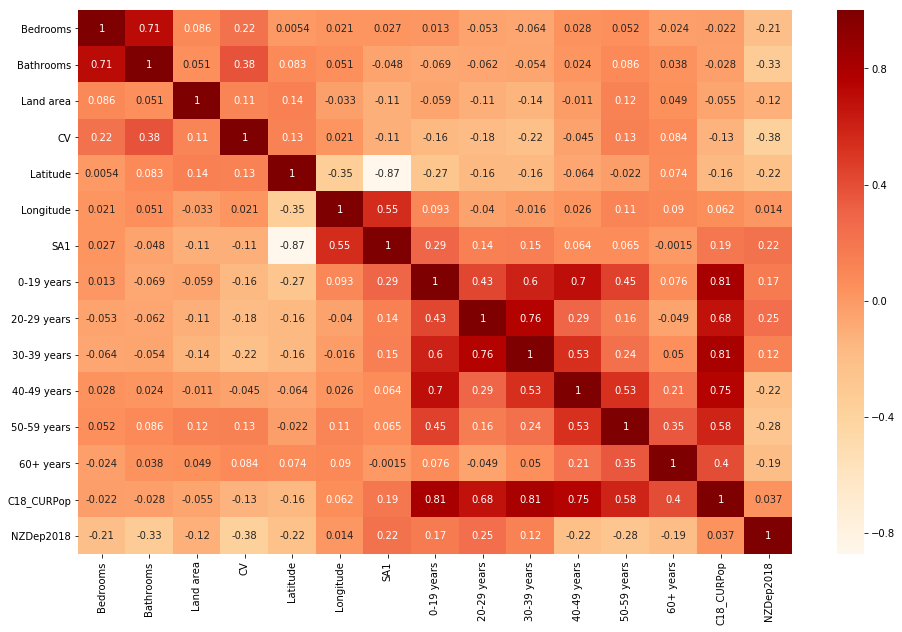

In [28]:
ax, fig = plt.subplots(figsize= (16,10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot =True, cmap = "OrRd")
plt.show()

# Visualisation with logged data values

Will be logging all the values in CV since it is a price the data will be right skewed which doesn't work well with linear regression.

In [29]:
logdataset = dataset

In [57]:
logdataset['log CV'] = np.log(logdataset['CV'])
logdataset.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPop,NZDep2018,log10 CV,log CV
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714.0,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0,5.982271,13.774689
1,5,3.0,"8 Corsica Way Karaka, Auckland",564.0,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0,6.096910,14.038654
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626.0,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0,6.096910,14.038654
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65.0,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0,5.869232,13.514405
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601.0,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0,5.799341,13.353475


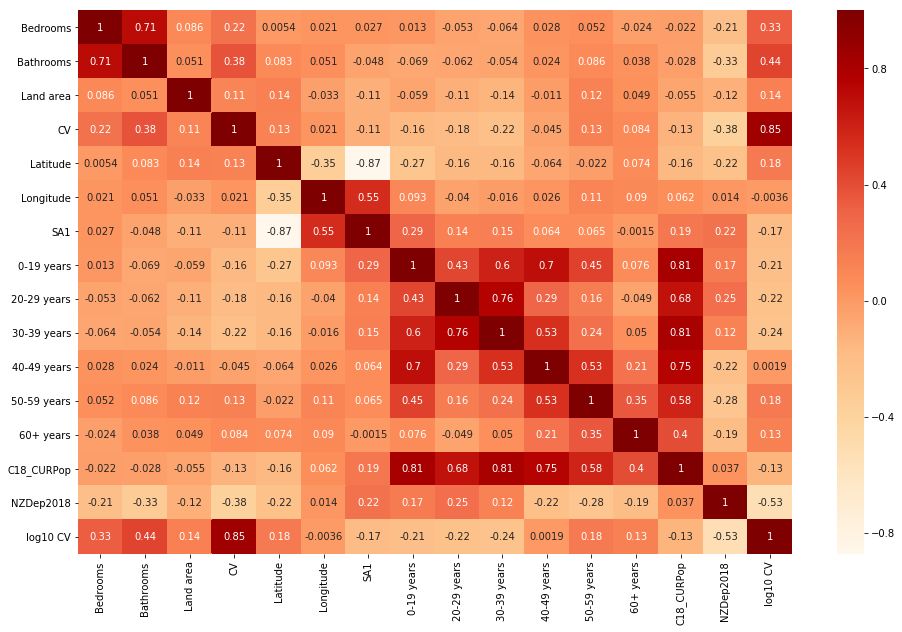

In [31]:
ax, fig = plt.subplots(figsize= (16,10))
correlation_matrix1 = logdataset.corr()
sns.heatmap(correlation_matrix1, annot =True, cmap = "OrRd")
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


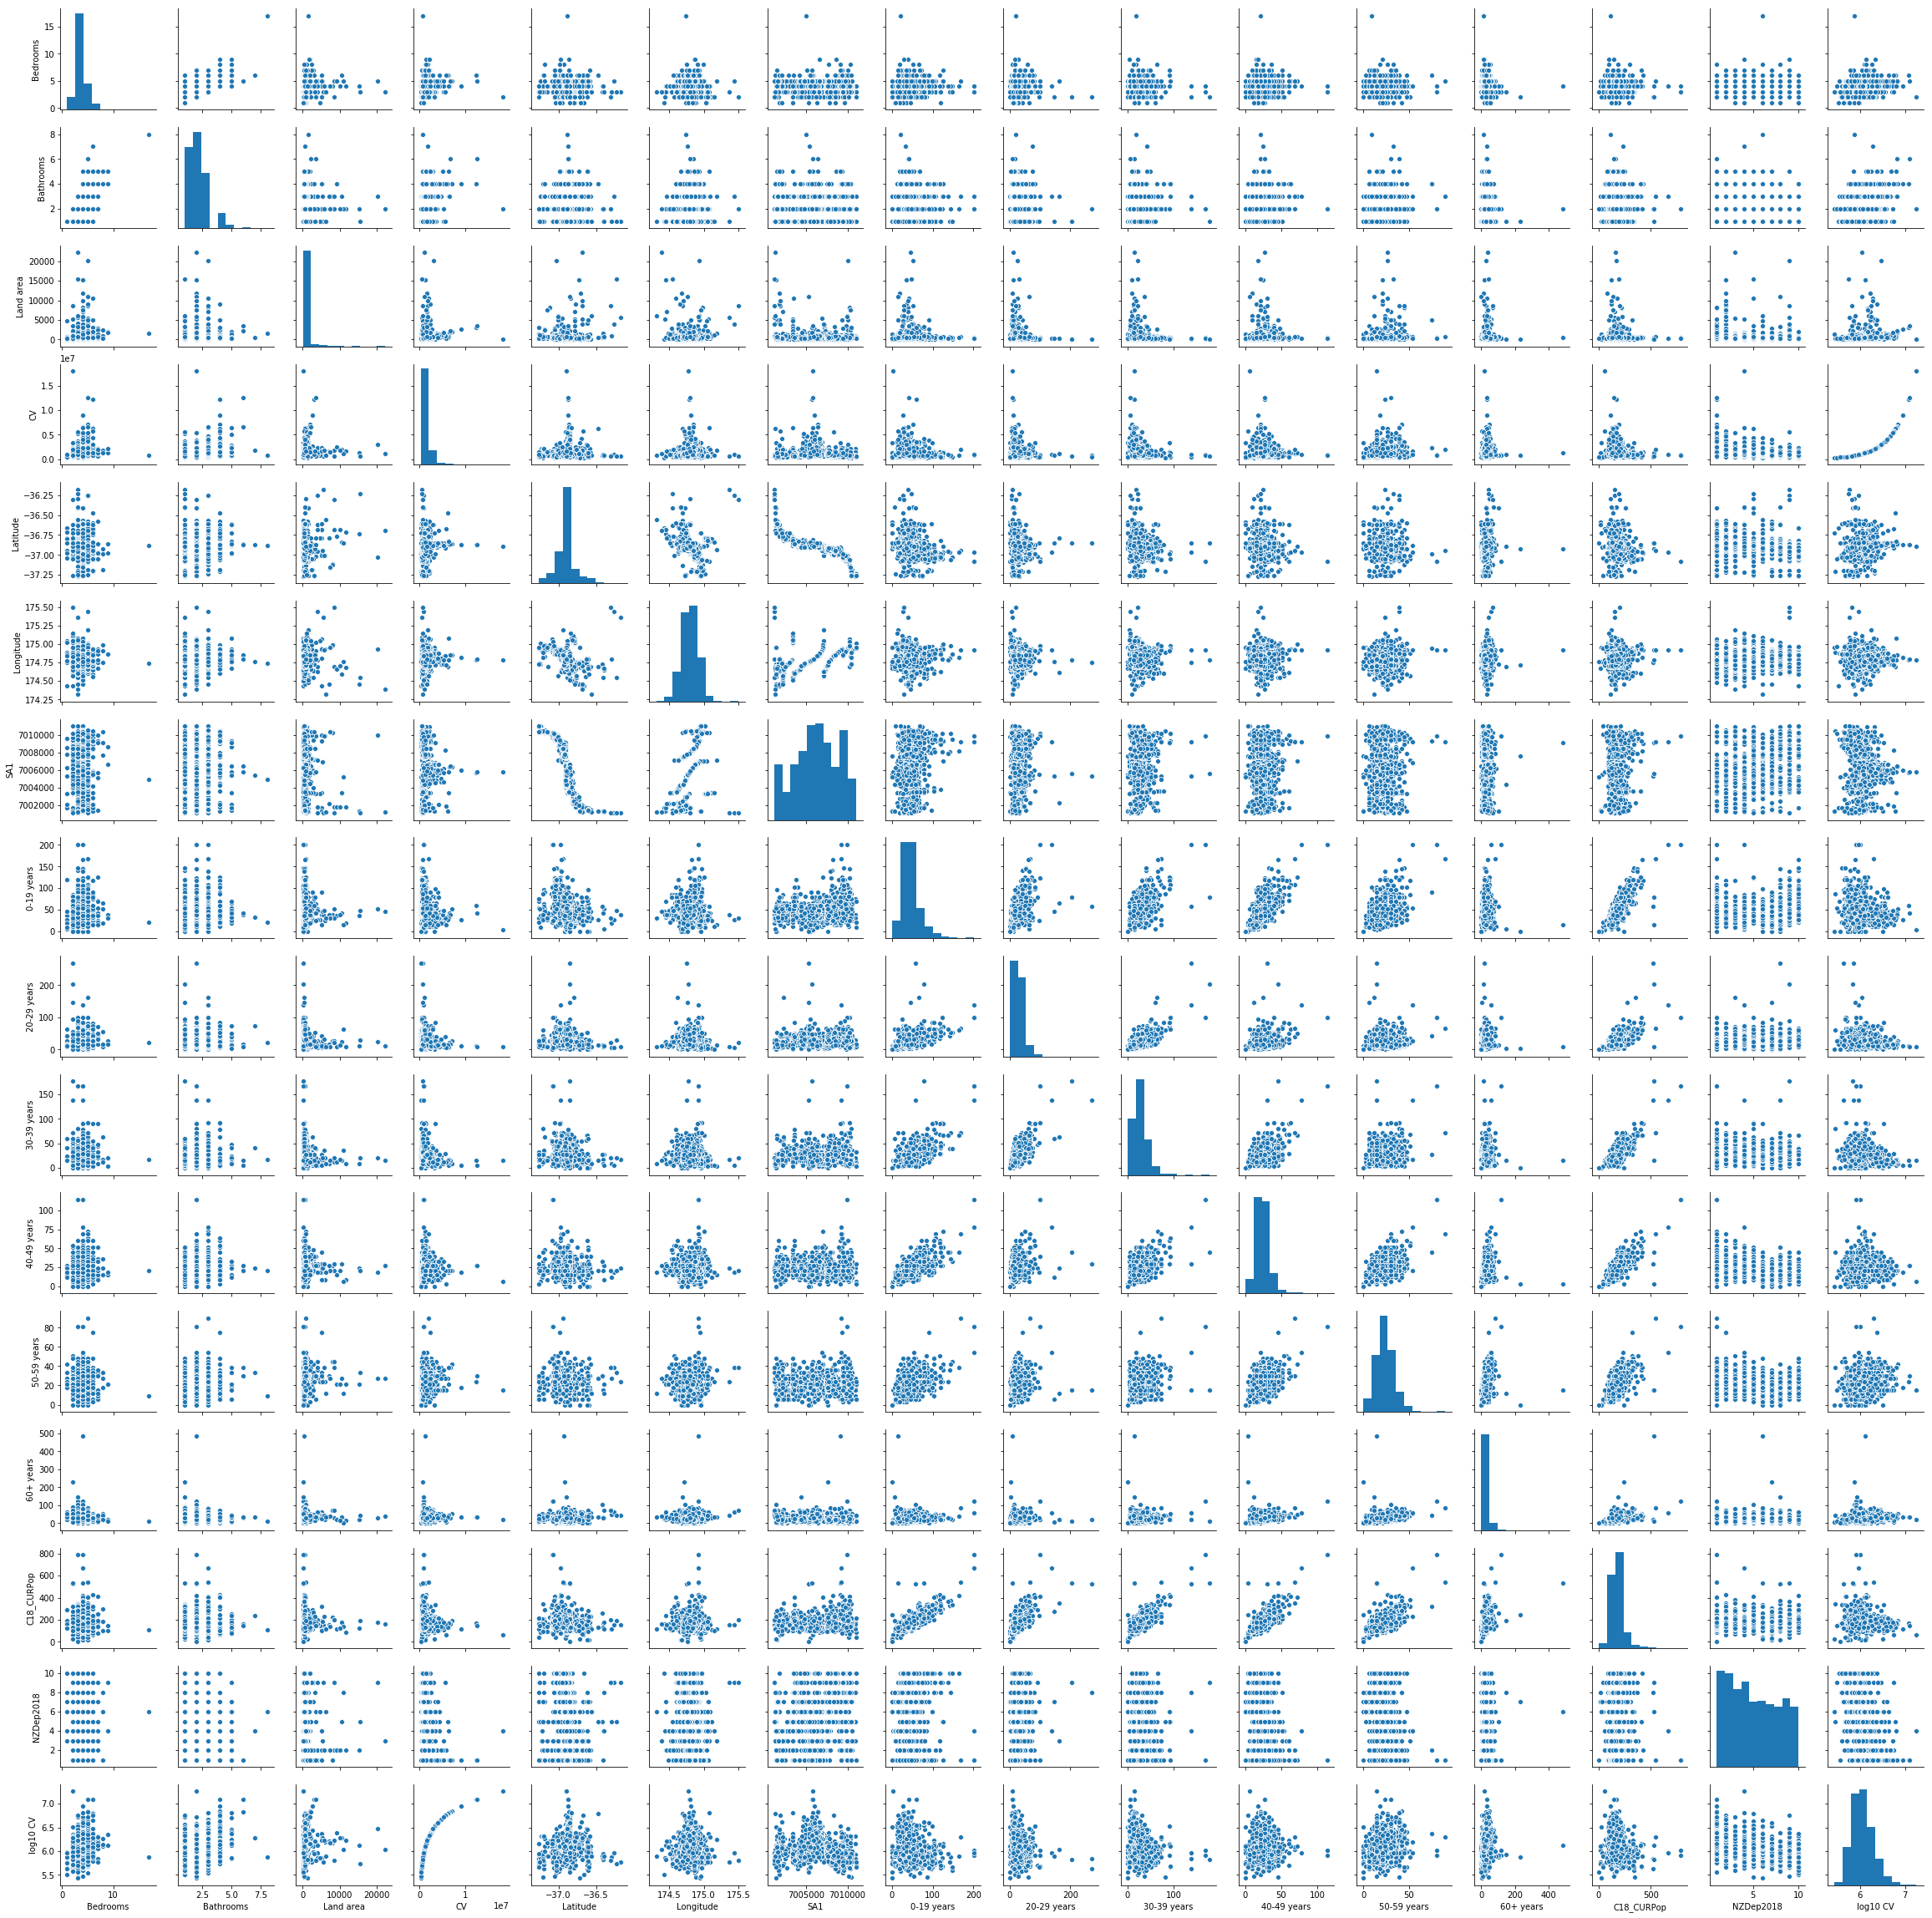

In [32]:
sns.pairplot(dataset, size = 2.0)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


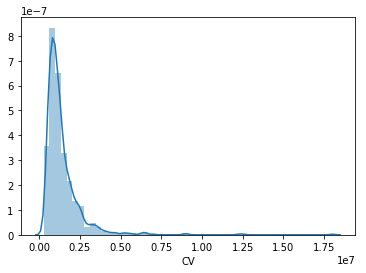

In [33]:
sns.distplot(logdataset['CV'])


The data here is clearly right skewed.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


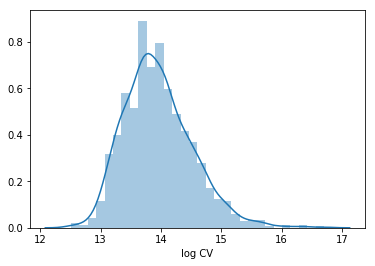

In [58]:
sns.distplot(logdataset['log CV'])

This is more uniformly distributed which should work much better.

# MACHINE LEARNING

## Train-test split

In [68]:
from sklearn.model_selection import train_test_split
x = logdataset.drop(['log CV', 'CV', 'SA1', 'Longitude', 'Address', 'Suburbs', 'log10 CV'], axis = 1)

In [69]:
y = logdataset['log CV']

In [70]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=42)

## Models

In [71]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
predicted = model.predict(test_x)

Text(0, 0.5, 'predicted_logCV')

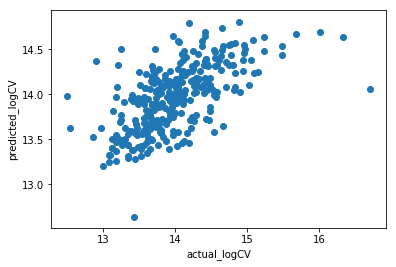

In [73]:
plt.scatter(test_y,predicted)
plt.xlabel('actual_logCV')
plt.ylabel('predicted_logCV')

In [74]:
model.coef_

array([ 1.16157662e-02,  1.58578690e-01,  9.68493344e-06,  6.18045603e-02,
       -3.48426245e-03, -3.89565073e-04, -7.89085258e-03, -1.97411900e-03,
        4.22107414e-03, -5.17723111e-04,  1.65836181e-03, -7.14183499e-02])

## Model Evaluation

In [75]:
model.score(test_x,test_y)

0.39128452155118865

This means that only about 39% of the data fit with the model which is quite low.

In [76]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, predicted)

0.19723789556731955

This is the RMSE value, generally the lower the value the better?